In [ ]:
from google.colab import files
uploaded = files.upload()

Saving siren_data_train.csv to siren_data_train.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import pandas as pd
import numpy as np
import io
data = pd.read_csv('/content/siren_data_train.csv')


In [ ]:
data.head()

,near_fid,near_x,near_y,near_angle,heard,building,xcoor,ycoor,noise,in_vehicle,asleep,no_windows,age
0,2712,1.998301e+06,9.011692e+06,-171.588672,1,0,1999193.0,9011824,0,0,0,0,59
1,2721,1.928907e+06,8.954624e+06,-51.208102,1,0,1928298.0,8955382,0,0,0,0,29
2,297,2.026384e+06,8.256164e+06,39.018754,1,0,2025706.0,8255615,0,0,0,0,32
3,739,1.743184e+06,8.052652e+06,15.046022,1,0,1742935.0,8052585,0,0,0,0,36
4,1852,1.350375e+06,7.909850e+06,144.603170,1,0,1350807.0,7909543,0,0,0,0,55


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   near_fid    5710 non-null   int64  
 1   near_x      5710 non-null   float64
 2   near_y      5710 non-null   float64
 3   near_angle  5710 non-null   float64
 4   heard       5710 non-null   int64  
 5   building    5710 non-null   int64  
 6   xcoor       5710 non-null   float64
 7   ycoor       5710 non-null   int64  
 8   noise       5710 non-null   int64  
 9   in_vehicle  5710 non-null   int64  
 10  asleep      5710 non-null   int64  
 11  no_windows  5710 non-null   int64  
 12  age         5710 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 580.0 KB


In [ ]:
data.isnull().sum()

near_fid      0
near_x        0
near_y        0
near_angle    0
heard         0
building      0
xcoor         0
ycoor         0
noise         0
in_vehicle    0
asleep        0
no_windows    0
age           0
dtype: int64

In [ ]:
assert pd.notnull(data).all().all()

In [ ]:
data['heard'].value_counts()

1    4340
0    1370
Name: heard, dtype: int64

<Axes: >

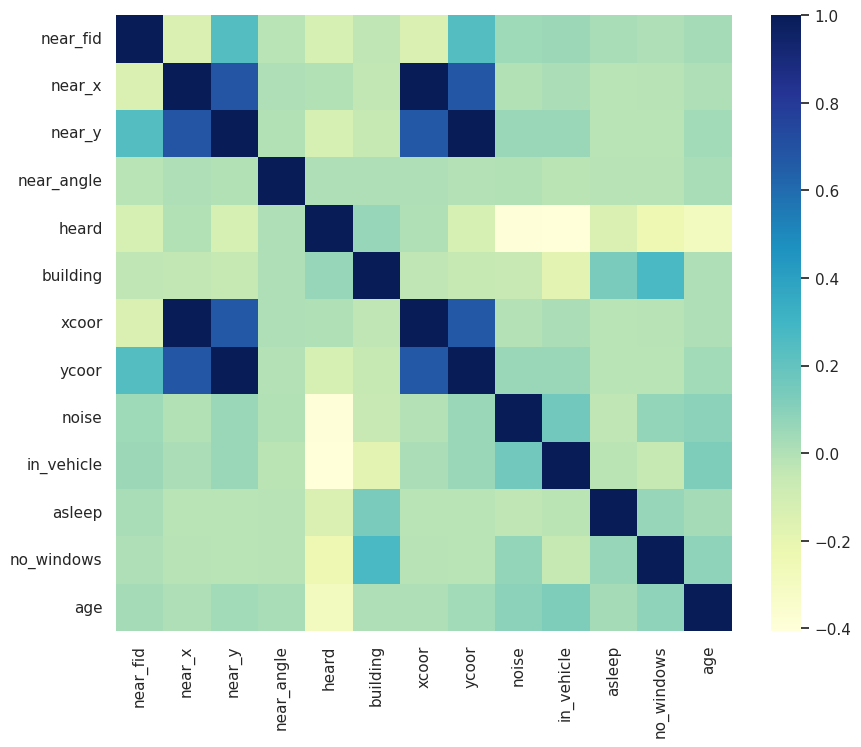

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap="YlGnBu",
            square=True, ax=ax)

In [ ]:
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Calculate distance for each row
data['distance'] = calculate_distance(data['near_x'], data['near_y'], data['xcoor'], data['ycoor'])


<Axes: >

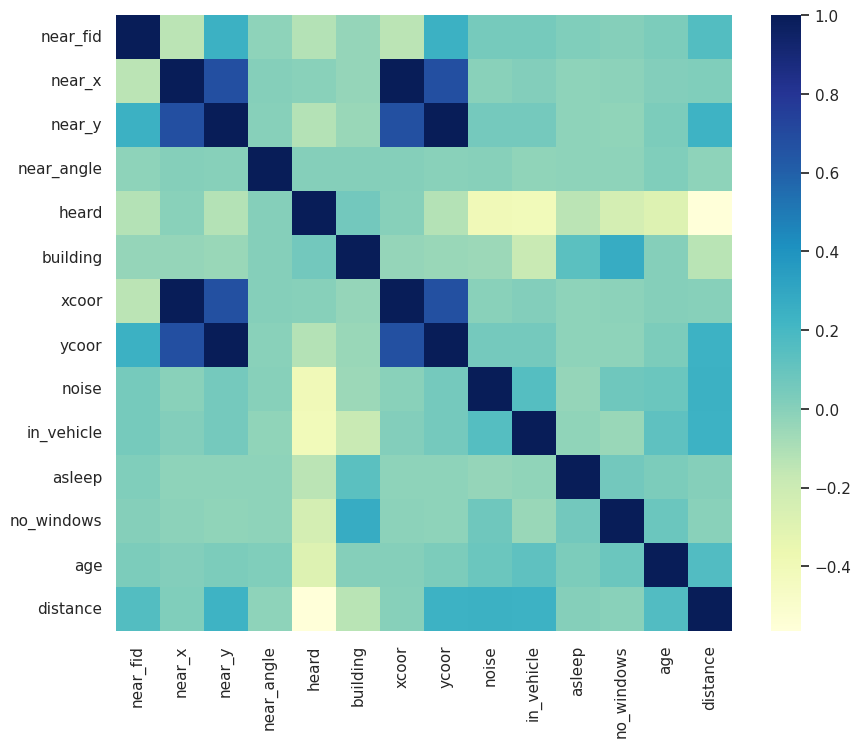

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap="YlGnBu",
            square=True, ax=ax)

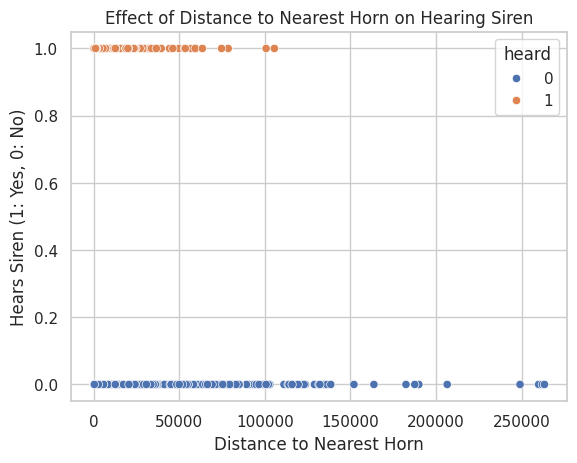

Correlation Coefficient: -0.5647781447877953


In [ ]:
sns.scatterplot(data=data, x='distance', y='heard', hue='heard')
plt.xlabel('Distance to Nearest Horn')
plt.ylabel('Hears Siren (1: Yes, 0: No)')
plt.title('Effect of Distance to Nearest Horn on Hearing Siren')
plt.show()

# Correlation coefficient
correlation = data['distance'].corr(data['heard'])
print("Correlation Coefficient:", correlation)

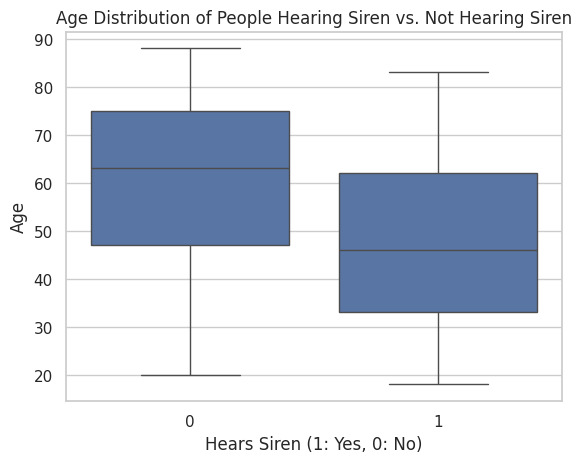

T-Statistic: -22.79964593973161
P-Value: 3.3998771811922806e-110


In [ ]:
sns.boxplot(data=data, x='heard', y='age')
plt.xlabel('Hears Siren (1: Yes, 0: No)')
plt.ylabel('Age')
plt.title('Age Distribution of People Hearing Siren vs. Not Hearing Siren')
plt.show()

# Statistical analysis
from scipy.stats import ttest_ind

hear_siren_age = data[data['heard'] == 1]['age']
not_hear_siren_age = data[data['heard'] == 0]['age']

# Perform t-test
t_statistic, p_value = ttest_ind(hear_siren_age, not_hear_siren_age)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

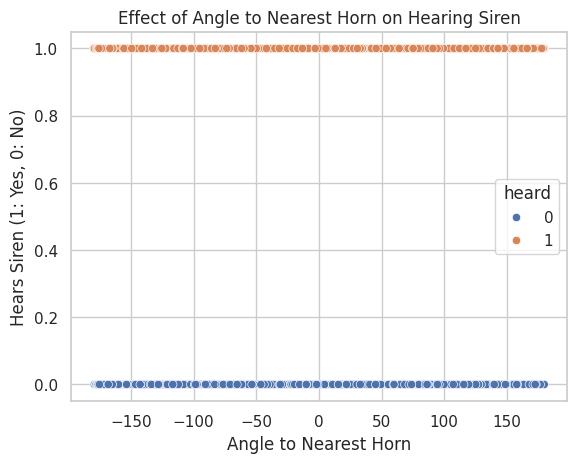

Correlation Coefficient: 0.006787582766103247


In [ ]:
sns.scatterplot(data=data, x='near_angle', y='heard', hue='heard')
plt.xlabel('Angle to Nearest Horn')
plt.ylabel('Hears Siren (1: Yes, 0: No)')
plt.title('Effect of Angle to Nearest Horn on Hearing Siren')
plt.show()

# Correlation coefficient
correlation = data['near_angle'].corr(data['heard'])
print("Correlation Coefficient:", correlation)

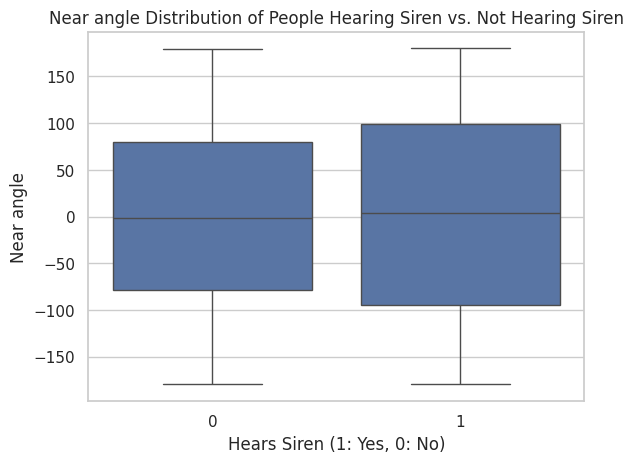

T-Statistic: 0.512822563157527
P-Value: 0.6080952897476064


In [ ]:
sns.boxplot(data=data, x='heard', y='near_angle')
plt.xlabel('Hears Siren (1: Yes, 0: No)')
plt.ylabel('Near angle')
plt.title('Near angle Distribution of People Hearing Siren vs. Not Hearing Siren')
plt.show()


from scipy.stats import ttest_ind
hear_siren_age = data[data['heard'] == 1]['near_angle']
not_hear_siren_age = data[data['heard'] == 0]['near_angle']

t_statistic, p_value = ttest_ind(hear_siren_age, not_hear_siren_age)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,data, test_size=0.2, random_state=42)

In [ ]:
X_train = data.drop(columns=['heard','near_fid','near_angle','near_x','near_y','xcoor','ycoor'])
y_train = data['heard']


In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Define your X_train and y_train

param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees in the forest
    'max_depth': randint(1, 20),        # Maximum depth of the trees
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'bootstrap': [True, False]          # Whether bootstrap samples are used when building trees
}

# Create Random Forest classifier
rf_classifier = RandomForestClassifier()

# Randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Get the best CV score
cv_accuracy = random_search.best_score_

print("Best Parameters:", best_params)
print("Cross Validation Accuracy:", cv_accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 145}
Cross Validation Accuracy: 0.9304728546409807


In [ ]:
#print("Best Parameters:")
#print(random_search.best_params_)

Best Parameters:
{'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 18}


In [ ]:
import sys
import pandas as pd
import csv
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)
predict = random_search.predict(test)
print("Accuracy: %.4f" % np.mean(predict == y_test))
pd.crosstab(predict,y_test)

[0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(random_search, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Cross-Validation Scores: [0.9190372  0.93982495 0.92778993 0.91675794 0.93428258]
Mean Cross-Validation Score: 0.9275385209027875


In [ ]:
class NaiveClassifier:
    def __init__(self, constant_prediction):
        self.constant_prediction = constant_prediction

    def fit(self, X, y=None):
        pass

    def predict(self, X):
        # Return an array of constant predictions
        return [self.constant_prediction] * len(X)

In [ ]:
classifier = NaiveClassifier(constant_prediction=1)
predictions = classifier.predict(X_test)

In [ ]:
predict2 = classifier.predict(X_test)
print("Accuracy: %.2f" % np.mean(predict2 == y_test))
pd.crosstab(predict2,y_test)


Accuracy: 0.75


heard,0,1
row_0,,
1,290,852


In [ ]:
#model
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       0.91      0.79      0.84       290
           1       0.93      0.97      0.95       852

    accuracy                           0.93      1142
   macro avg       0.92      0.88      0.90      1142
weighted avg       0.92      0.93      0.92      1142



In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

auc = roc_auc_score(y_test, predict)
print("AUC:", auc)

AUC: 0.880743079164643
